[255 255 255]
[154 152 152]


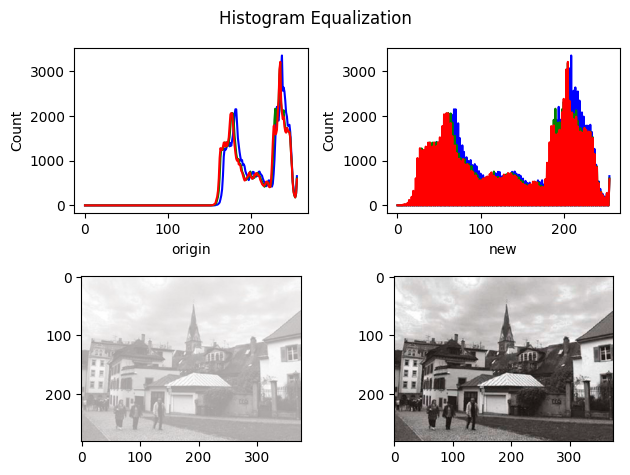

In [5]:
%matplotlib inline
import cv2 
import matplotlib.pyplot as plt
import numpy as np

hist_half = cv2.imread("./asset_imgs/hist_half.jpg")#,cv2.IMREAD_GRAYSCALE)
if hist_half is None:
    print("Image file read error")


def plotHistogram( img, x_label, y_label ):
    color = [ 'b','g','r']
    for i in range(3):
        hist = cv2.calcHist(images = [img[:,:,i]], 
                     channels = [0], 
                     mask = None, 
                     histSize = [256], 
                     ranges = [0, 256])
        plt.plot(hist, color[i])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    

high = np.array([np.max(hist_half[:,:,0]),np.max(hist_half[:,:,1]),np.max(hist_half[:,:,2])])
print(high)
low = np.array([np.min(hist_half[:,:,0]),np.min(hist_half[:,:,1]),np.min(hist_half[:,:,2])])
gap = high - low
print(low)
newImage = np.zeros( hist_half.shape, hist_half.dtype)

for y in range(hist_half.shape[0]):
    for x in range(hist_half.shape[1]):
        for c in range( hist_half.shape[2]):
            newImage[y,x,c] = float(hist_half[y,x,c]-low[c])/gap[c]*255
        
hist_new = cv2.calcHist(images = [newImage], 
                     channels = [2], 
                     mask = None, 
                     histSize = [256], 
                     ranges = [0, 256])    
plt.subplot(2,2,1)
plotHistogram(hist_half,"origin","Count")
plt.subplot(2,2,2)
plotHistogram(newImage,"new","Count")
plt.subplot(2,2,3)
plt.imshow(hist_half)
plt.subplot(2,2,4)
plt.imshow(newImage)
plt.suptitle("Histogram Equalization")

plt.tight_layout()
plt.show()